# Problem 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from iminuit import Minuit
import sys
#from sympy import *
from functools import partial 
from scipy import stats
import scipy
from tqdm import tqdm


## The scores of two tests (A & B) are both Gaussianly distributed with µ = 50, σ = 20.

- What fraction of students will get a score in test A in the range [55,65]?

The distribution of student grades for test A follows a Gaussian distribution $P (x; \mu = 50, \sigma = 20)$. The
fraction of people who will get a score within the range can be found as the definite integral over the range of
the probability distribution. The integral can be evaluated by sympy’s integrate() or numpy trapz() function or we can use the the culmative distribution function

In [3]:
#1.1.1
# Use the CDF approach
solution = stats.norm.cdf(65,loc=50,scale=20)-stats.norm.cdf(55,loc=50,scale=20)
print(solution, "CDF")

x_val = np.linspace(55,65,1000)
solution = np.trapz(stats.norm.pdf(x_val,loc = 50, scale =20), dx = x_val[1] - x_val[0])
print(solution, "integral")

0.17466632194020804 CDF
0.17466631924350323 integral


/tmp/ipykernel_61512/792118855.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  solution = np.trapz(stats.norm.pdf(x_val,loc = 50, scale =20), dx = x_val[1] - x_val[0])


- How well can the mean score be determined, based on 120 B test scores?

Here we again can use two different aproaches, theoretical and simulation

The theoretical uncertainty on the mean can be calculated, as the mean on individual measure-
ments $\sigma = 20$ is known. The standard deviation of the mean drops with the square root of the number of
measurements. This gives a theoretical uncertainty on the mean for 120 random scores of
$$\sigma_\mu = \frac{\mu}{\sqrt{N}} = \frac{20}{\sqrt{120}}$$

We can likewise simulate the exam by using stats random variates function. From this we caluculate the standard deviation of the variates and divide with the squareroot of the number of drawn variates 

In [5]:
#1.1.2 simulation
np.random.seed(42)
A = np.random.normal(loc=50,scale=20,size=120)
solution = A.std(ddof=1)/np.sqrt(120)
print(A.std(ddof=1)/np.sqrt(120),'simulated')

#1.1.2 analytical
solution = (20/np.sqrt(120))
print(solution, "analytical")

1.6893894295482144 simulated
1.8257418583505538 analytical


- If scores correlate with ρA,B = 0.60, what fraction should get a score above 60 in both tests?late with ρA,B = 0.60, what fraction should get a score above 60 in both tests?

Again multiple ways to solve it, below are listed three solutions with varying complexity.

First we try to sample random variates from the mulivariate (2D) normal distribution we are given. To work with a 2D gaussian we define the mean as 
$$\mu = \begin{bmatrix} 
\mu_A  \\ 
\mu_B\\ 
\end{bmatrix} $$

And the correlation matrix as 
$$\mu = \begin{bmatrix} 
\sigma_A^2 & \rho\sigma_A\sigma_B \\ 
\rho\sigma_A\sigma_B & \sigma_B^2\\ 
\end{bmatrix} $$






In [6]:
mu_A = mu_B = 50
sig_A = sig_B = 20
rho = .6

mu = [mu_A, mu_B]
cor = [[sig_A**2, rho*sig_A*sig_B], [rho*sig_A*sig_B, sig_B**2]] 
print(mu)
print(cor)

[50, 50]
[[400, 240.0], [240.0, 400]]


Next we sample a large number of variates from the 2D gaussian. If the number of samples is too low, we might risk undersampling. For this we should at least sample 10000

We then sort all of the samples and count how many of the samples where both A & B > 60

0.1702 Sampling answer


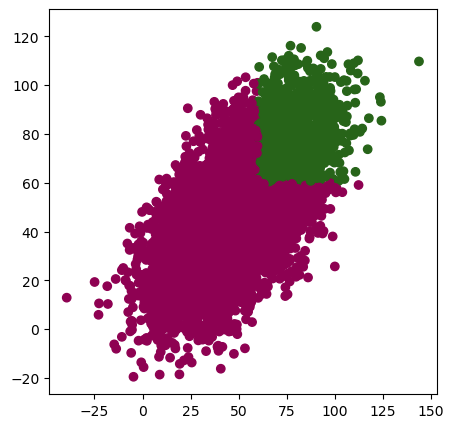

In [9]:
N = 10000
samples = np.random.multivariate_normal(mean = mu, cov = cor, size = N)
mask = samples.copy()
mask = np.where(mask > 60, 1, 0)
mask = mask[:,1]*mask[:,0]
solution = np.sum(mask)/N
print(solution, 'Sampling answer')

fig,ax = plt.subplots(1,1, figsize = (5,5))
ax.scatter(samples[:,0], samples[:,1], color = plt.cm.PiYG(mask/.5))



It can be done analytically by making a bivariate normal distrubution with $\mu_A = 50$, $\mu_B = 50$, $\sigma_A = 20$, $\sigma_B = 20$, and $\rho = 0.6$ by calculating the CDF:
$$CDF = \int_{60}^{\infty}\int_{60}^{\infty}\frac{1}{2\pi \sigma_A\sigma_B\sqrt{1-\rho^2}} exp \left[-\frac{z}{2(1-\rho^2)}\right]\,dA\ dB $$
where,

$$z = \frac{(A-\mu_A)^2}{\sigma_A^2}-\frac{2\rho(A-\mu_A)(B-\mu_B)}{\sigma_A\sigma_B}+\frac{(B-\mu_B)^2}{\sigma_B^2}$$

We could do the calculation by hand but we can also do a 2D integration using numpy trapz, and confirm the result found in the sampling approach

In [10]:
x, y = np.mgrid[60:200:.05, 60:200:.05]
pos = np.dstack((x, y))
pdf = stats.multivariate_normal.pdf(pos, mu, cor)
result = np.trapz(np.trapz(pdf, np.arange(60,200,.05), axis=0), np.arange(60,200,.05), axis=0)
print(result)

0.1795603002616231


/tmp/ipykernel_61512/479836862.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  result = np.trapz(np.trapz(pdf, np.arange(60,200,.05), axis=0), np.arange(60,200,.05), axis=0)
